Streamlit App MVP

In [2]:


#Coding the EDA Dashboard part
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Bank Marketing EDA", layout="wide")

@st.cache_data
def load_data():
    return pd.read_csv("../data/bank-full.csv", sep=';')
df = load_data()

st.title("📊 Exploratory Data Analysis")

st.subheader("1. Preview of Dataset")
st.dataframe(df.head())

st.subheader("2. Target Variable Distribution")
fig, ax = plt.subplots()
sns.countplot(x="y", data=df, ax=ax)
st.pyplot(fig)

st.subheader("3. Column Distribution")
selected_col = st.selectbox("Choose a column to explore", df.columns)
if df[selected_col].dtype == "object":
    fig, ax = plt.subplots()
    sns.countplot(data=df, x=selected_col, hue="y", ax=ax)
    plt.xticks(rotation=45)
    st.pyplot(fig)
else:
    fig, ax = plt.subplots()
    sns.histplot(df[selected_col], kde=True, ax=ax)
    st.pyplot(fig)

2025-08-05 19:46:41.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:46:41.351 No runtime found, using MemoryCacheStorageManager
2025-08-05 19:46:41.353 No runtime found, using MemoryCacheStorageManager
2025-08-05 19:46:41.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:46:41.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:46:41.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:46:41.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:46:41.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:46:41.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

In [4]:
### Model App Section
import streamlit as st
import pandas as pd
import numpy as np

st.set_page_config(page_title="Bank Marketing Prediction", layout="wide")

@st.cache_data
def load_data():
    return pd.read_csv("../data/bank-full.csv", sep=';')
df = load_data()

def dummy_model_predict(X):
    return np.random.choice([0, 1])

st.title("🤖 Predict Customer Investment")

st.info("Input customer data below to predict whether they'll invest.")

with st.form("input_form"):
    age = st.number_input("Age", 18, 95, 30)
    job = st.selectbox("Job", sorted(df["job"].unique()))
    marital = st.selectbox("Marital Status", sorted(df["marital"].unique()))
    education = st.selectbox("Education", sorted(df["education"].unique()))
    default = st.selectbox("Has Credit in Default?", sorted(df["default"].unique()))
    balance = st.number_input("Bank Balance (€)", -5000, 100000, 1000)
    housing = st.selectbox("Has Housing Loan?", sorted(df["housing"].unique()))
    loan = st.selectbox("Has Personal Loan?", sorted(df["loan"].unique()))

    submitted = st.form_submit_button("Predict")

if submitted:
    user_data = pd.DataFrame({
        'age': [age],
        'job': [job],
        'marital': [marital],
        'education': [education],
        'default': [default],
        'balance': [balance],
        'housing': [housing],
        'loan': [loan],
    })

    prediction = dummy_model_predict(user_data)

    if prediction == 1:
        st.success("✅ This customer is likely to invest!")
    else:
        st.warning("❌ This customer is unlikely to invest.")

    st.write("🔍 Input Summary:")
    st.dataframe(user_data)


2025-08-05 21:08:14.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:14.950 No runtime found, using MemoryCacheStorageManager
2025-08-05 21:08:15.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:15.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:15.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:15.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:15.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:15.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:08:15.014 Thread 'MainThread':

# EDA VISUALIZATIONS

### FIRST FEW ANALYSIS


In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#load the dataset
df = pd.read_csv("../data/bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# reading the datset
df.head()
df.shape
df.info()
df.describe(include='all')
df['y'].value_counts(normalize=True)  # Check target distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [7]:
# CHECKING FOR MISSING VALUES
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].value_counts().get('unknown', 0)} 'unknown' values")

job: 288 'unknown' values
marital: 0 'unknown' values
education: 1857 'unknown' values
default: 0 'unknown' values
housing: 0 'unknown' values
loan: 0 'unknown' values
contact: 13020 'unknown' values
month: 0 'unknown' values
poutcome: 36959 'unknown' values
y: 0 'unknown' values


### Starting with EDA - Visualizations

#### Target Variable Distribution



Text(0.5, 1.0, 'Target Variable Distribution')

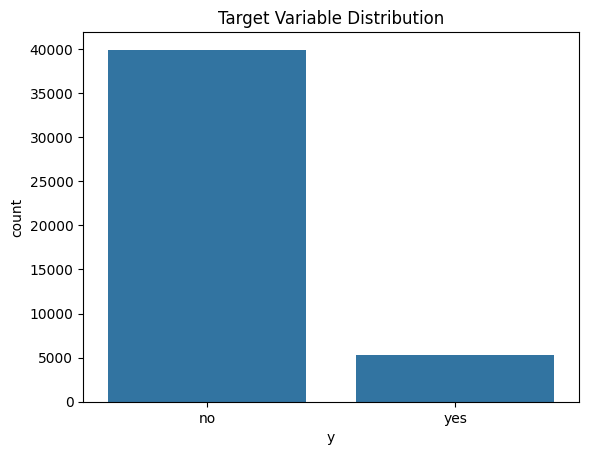

In [8]:
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")

### Numerical Features Distribution

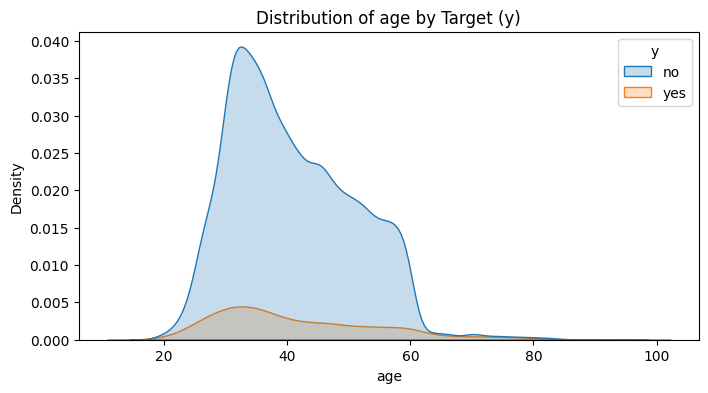

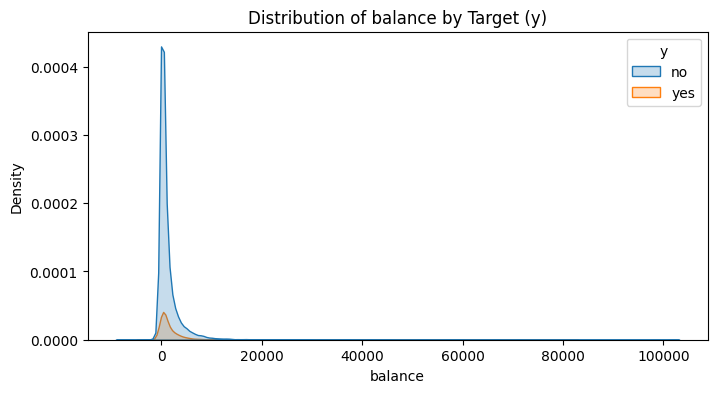

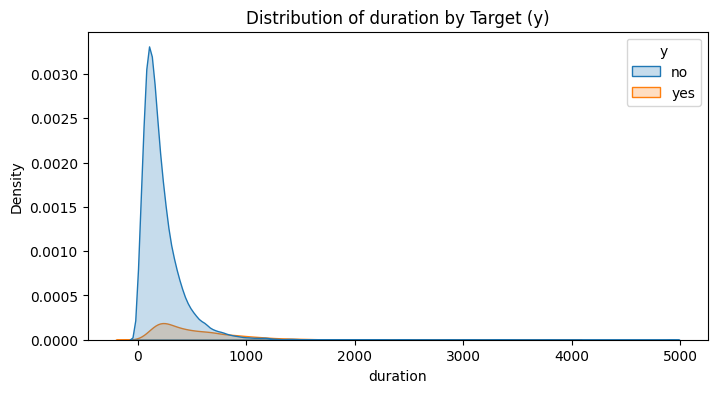

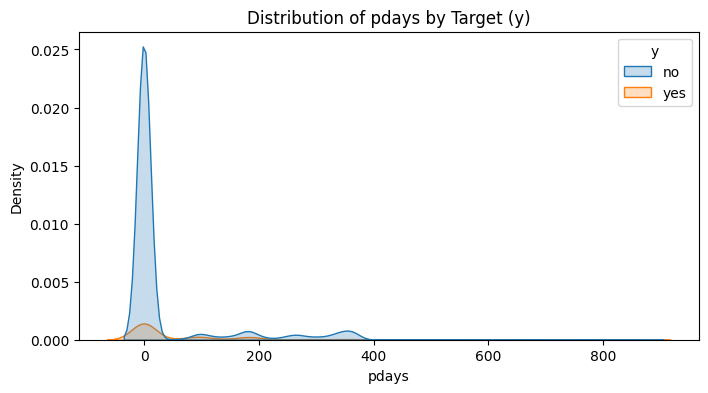

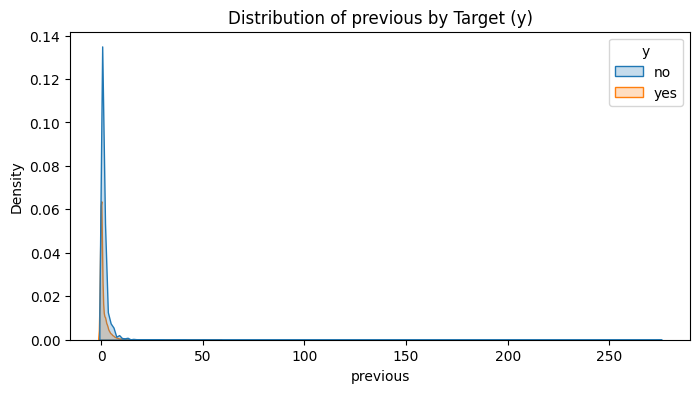

In [13]:

numeric_features = ['age', 'balance', 'duration', 'pdays', 'previous']

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='y', fill=True)
    plt.title(f"Distribution of {col} by Target (y)")
    plt.show()

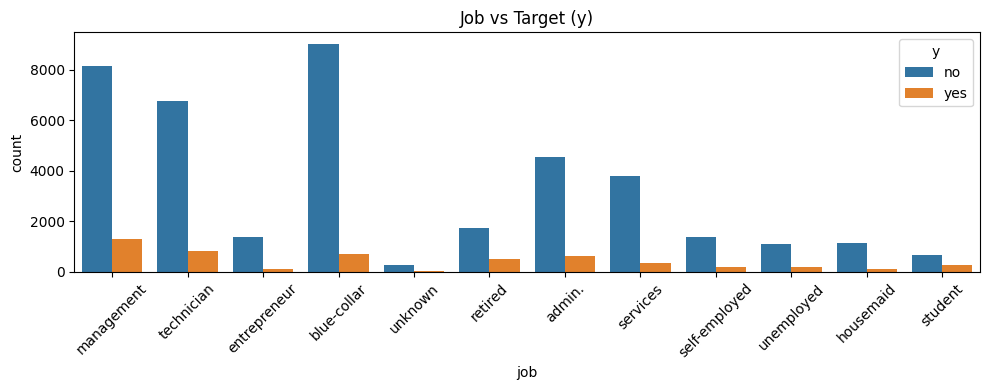

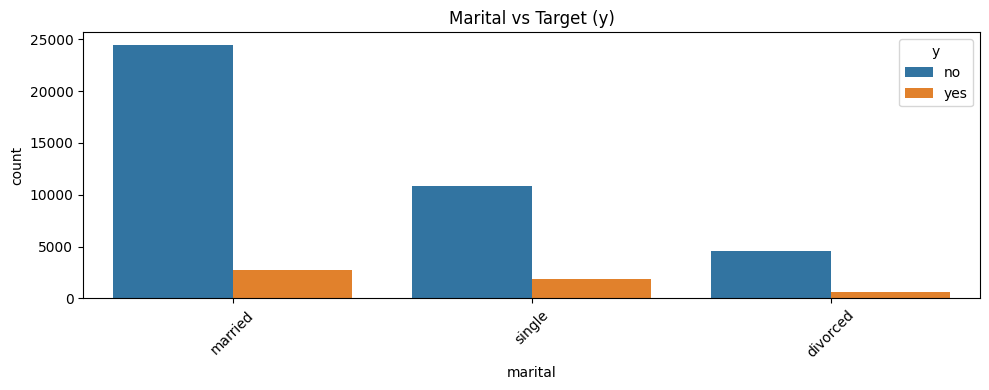

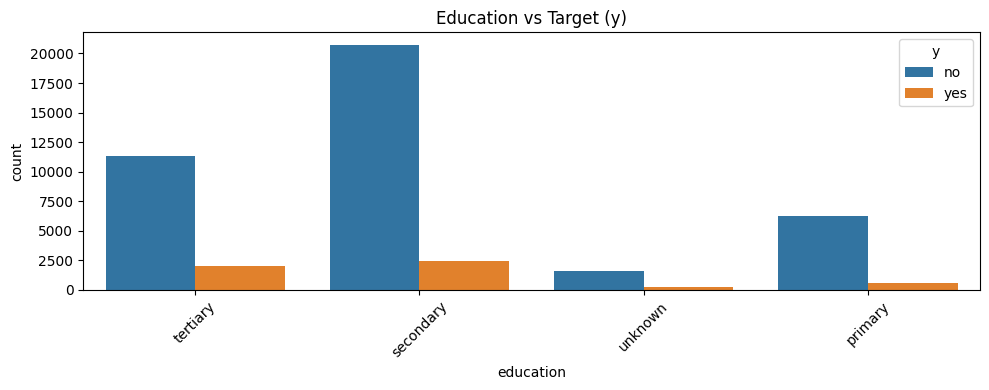

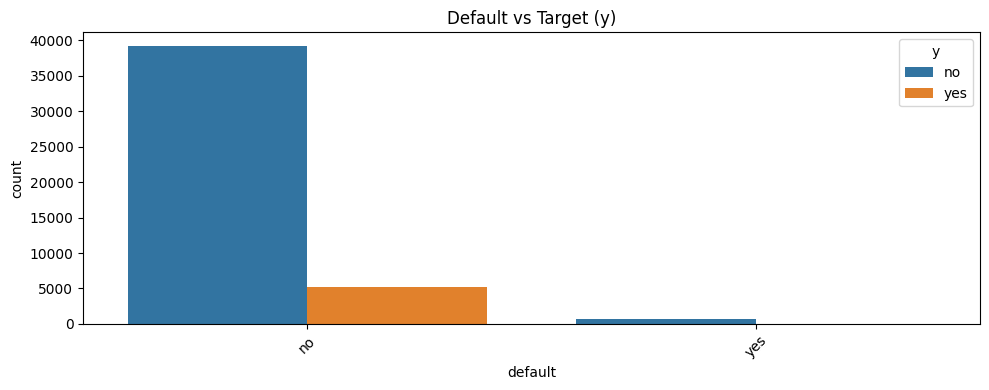

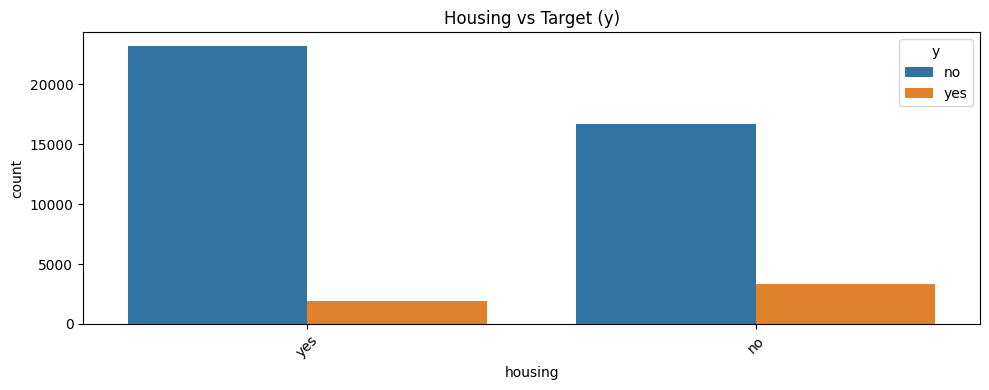

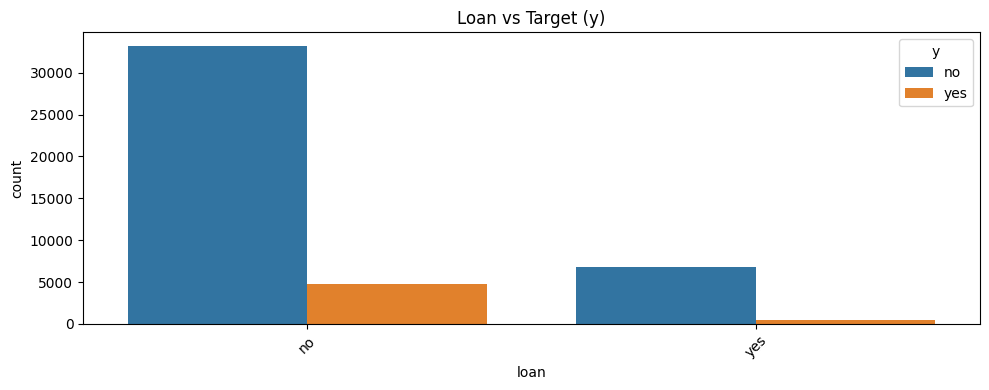

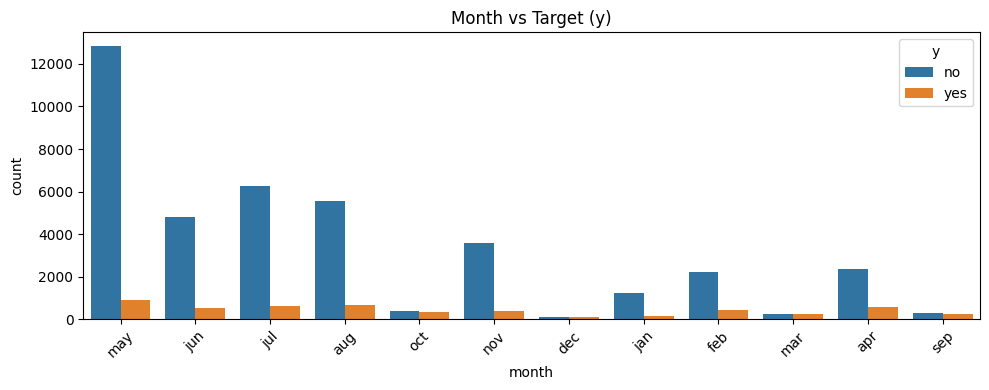

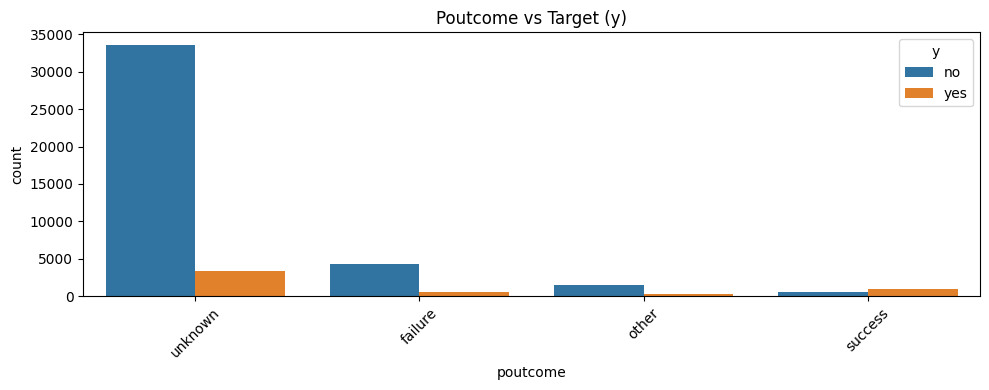

In [10]:
#Categorical Features Distribution
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f"{col.capitalize()} vs Target (y)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

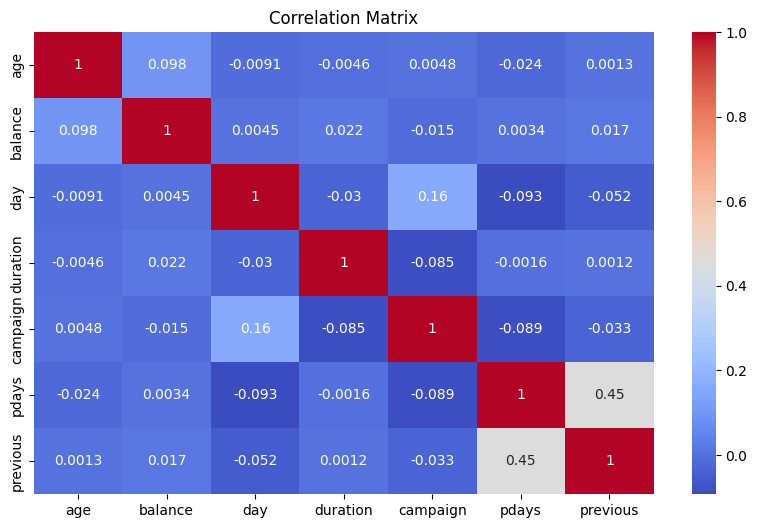

In [11]:
#Correlation Heatmap
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


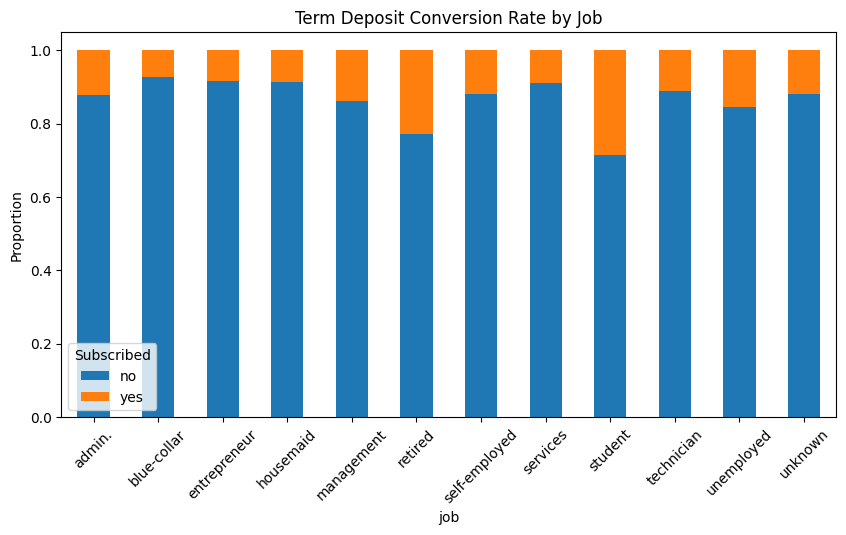

In [12]:
#Conversion Rate per Category
conversion_rate = df.groupby('job')['y'].value_counts(normalize=True).unstack()

conversion_rate.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Term Deposit Conversion Rate by Job")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.show()


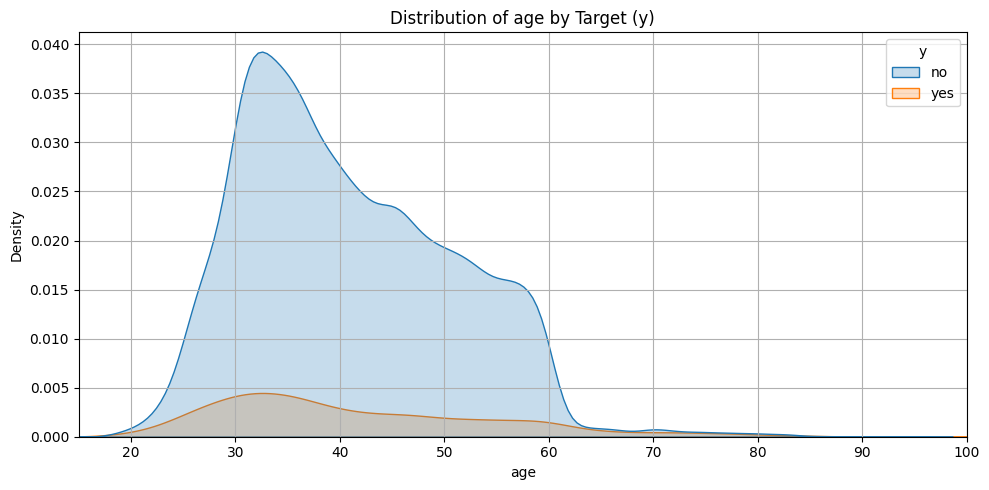

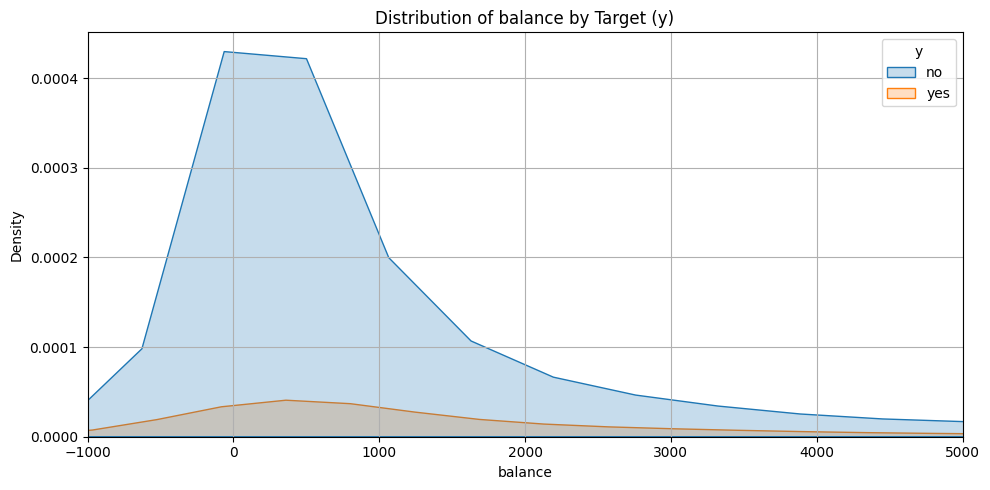

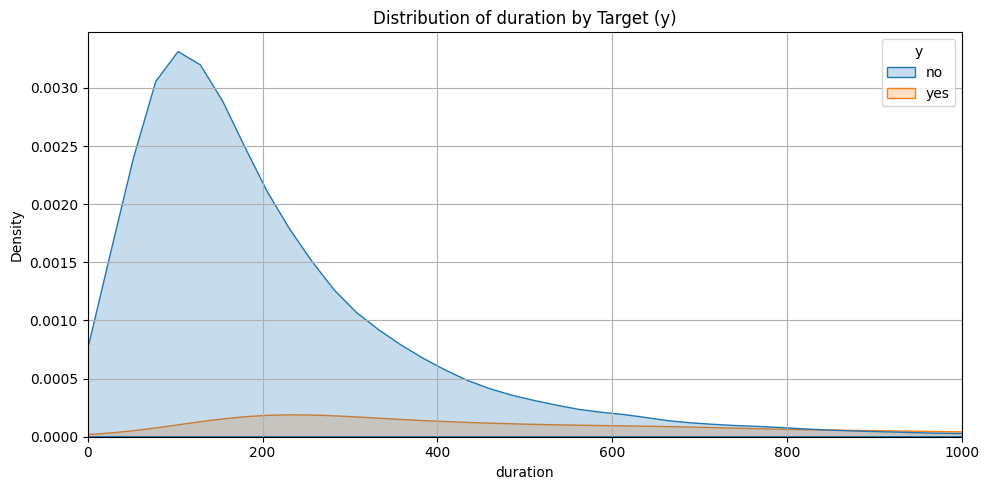

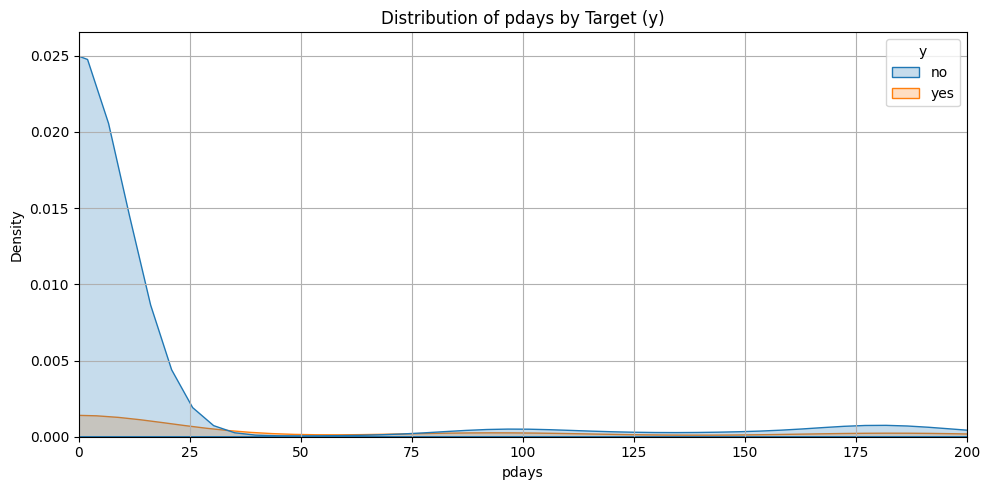

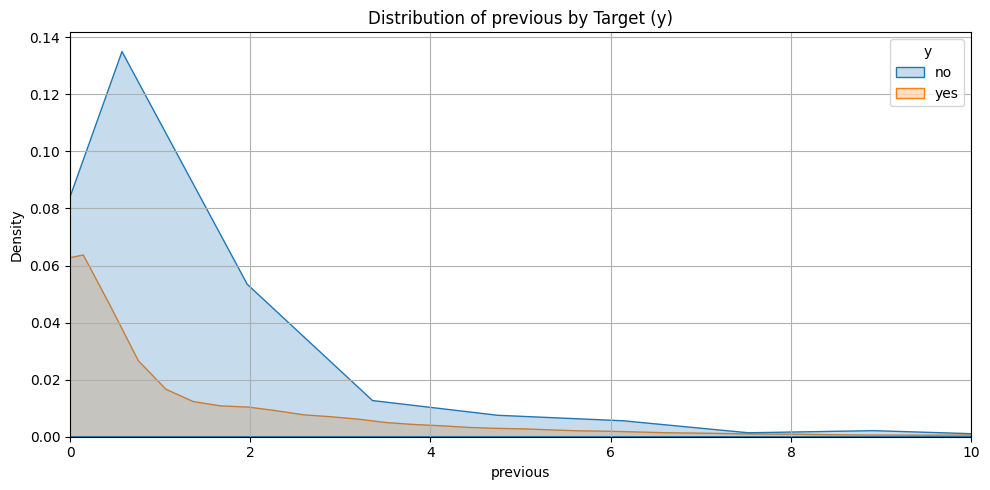

In [ ]:
#Zooming in on the numerical features
numeric_features = ['age', 'balance', 'duration', 'pdays', 'previous']

# Optional: define zoom limits per feature (adjust as needed)
zoom_limits = {
    'age': (15, 100),
    'balance': (-1000, 5000),
    'duration': (0, 1000),
    'pdays': (0, 200),
    'previous': (0, 10)
}

for col in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=col, hue='y', fill=True)
    plt.title(f"Distribution of {col} by Target (y)")

    # Apply zoom if limits are defined
    if col in zoom_limits:
        plt.xlim(zoom_limits[col])

    plt.grid(True)
    plt.tight_layout()
    plt.show()

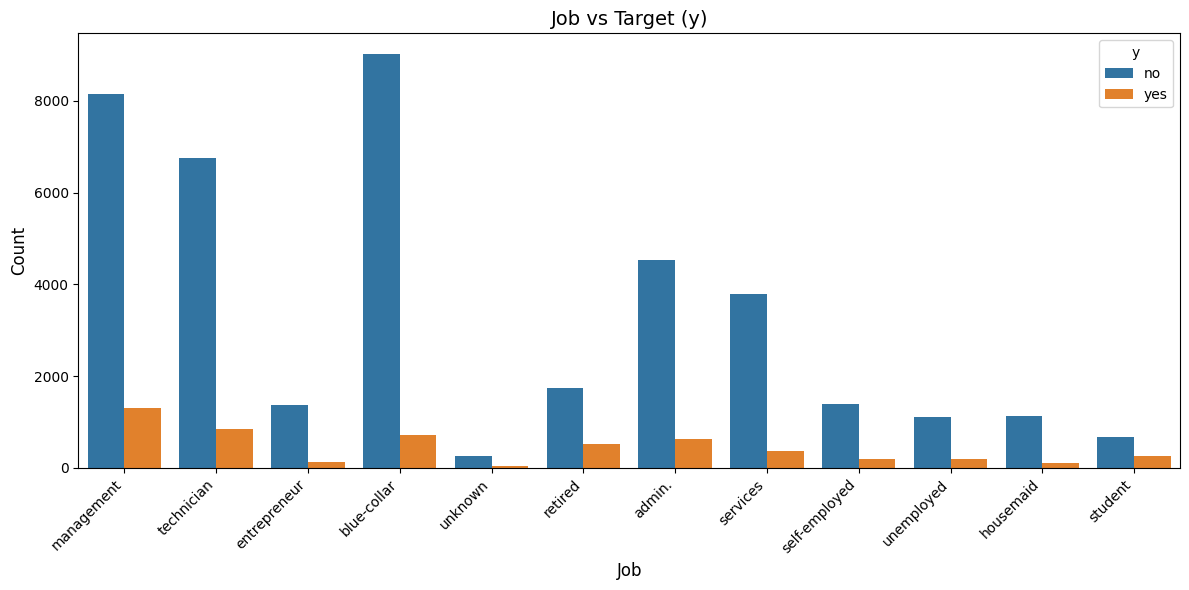

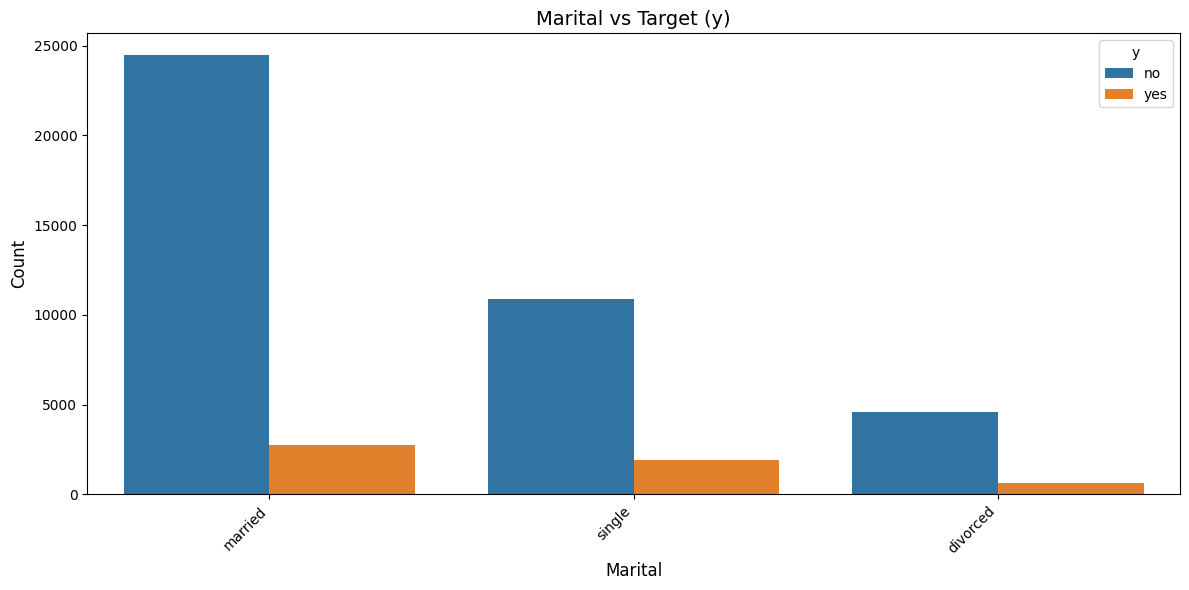

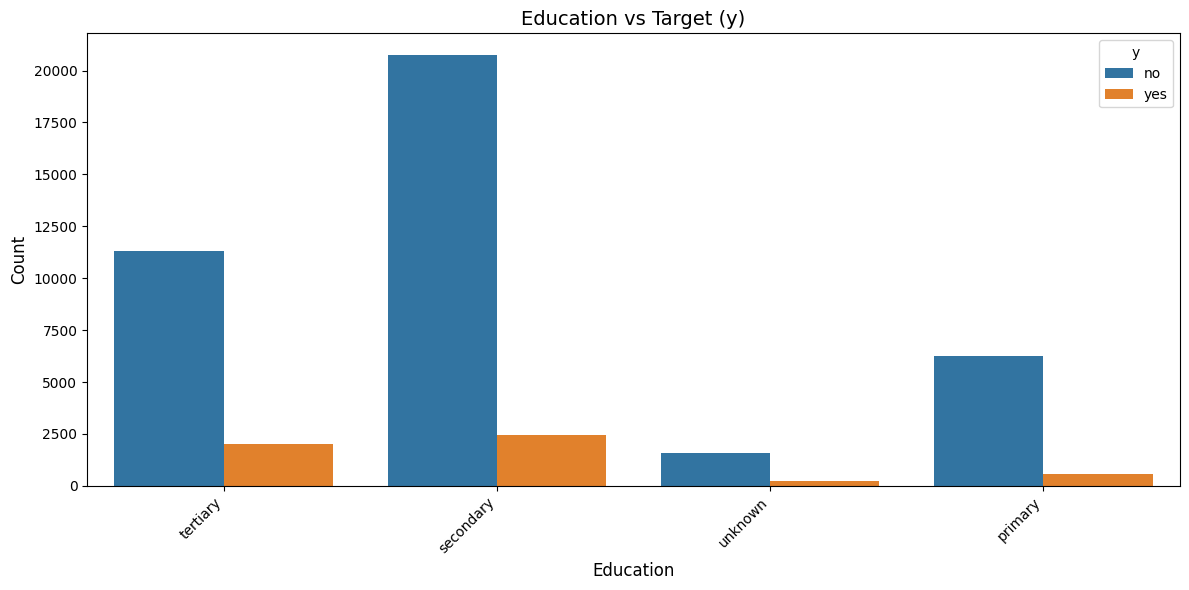

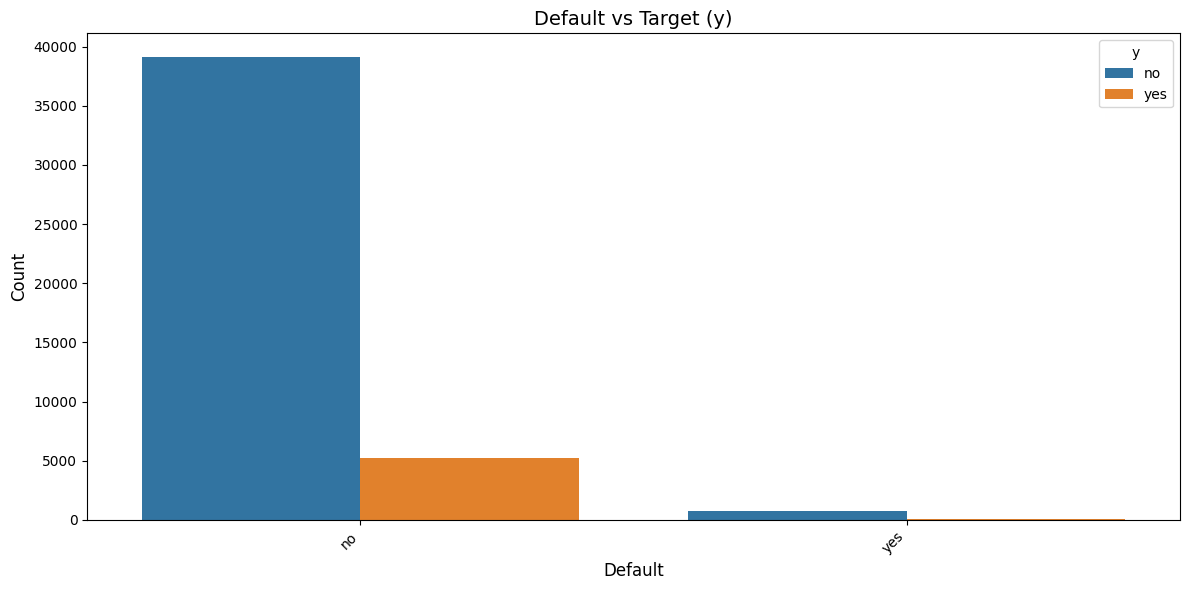

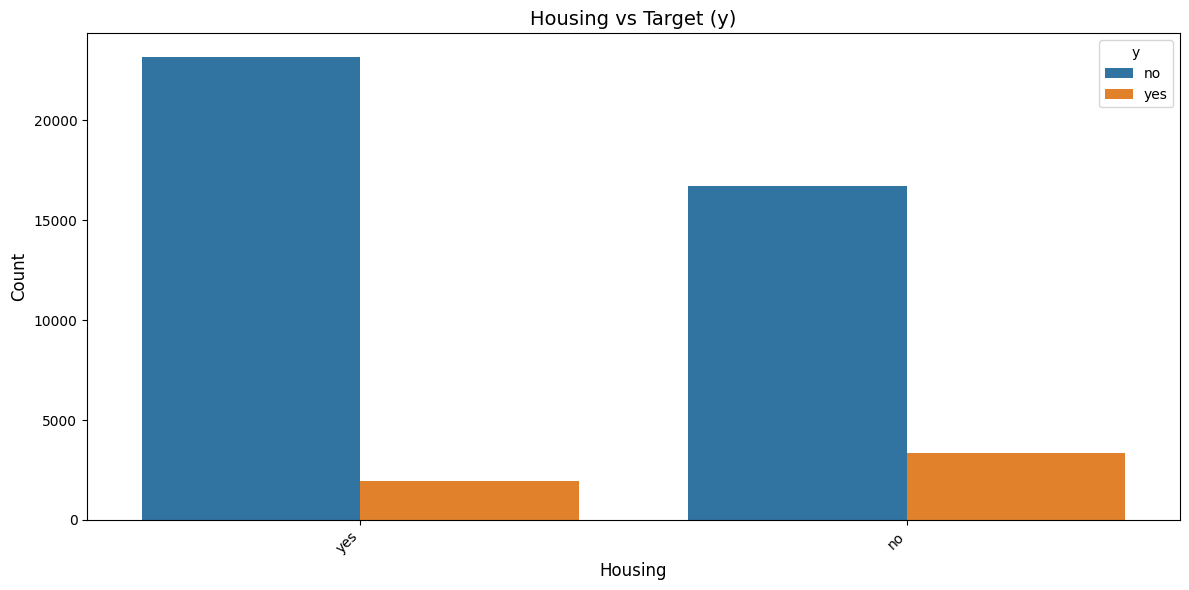

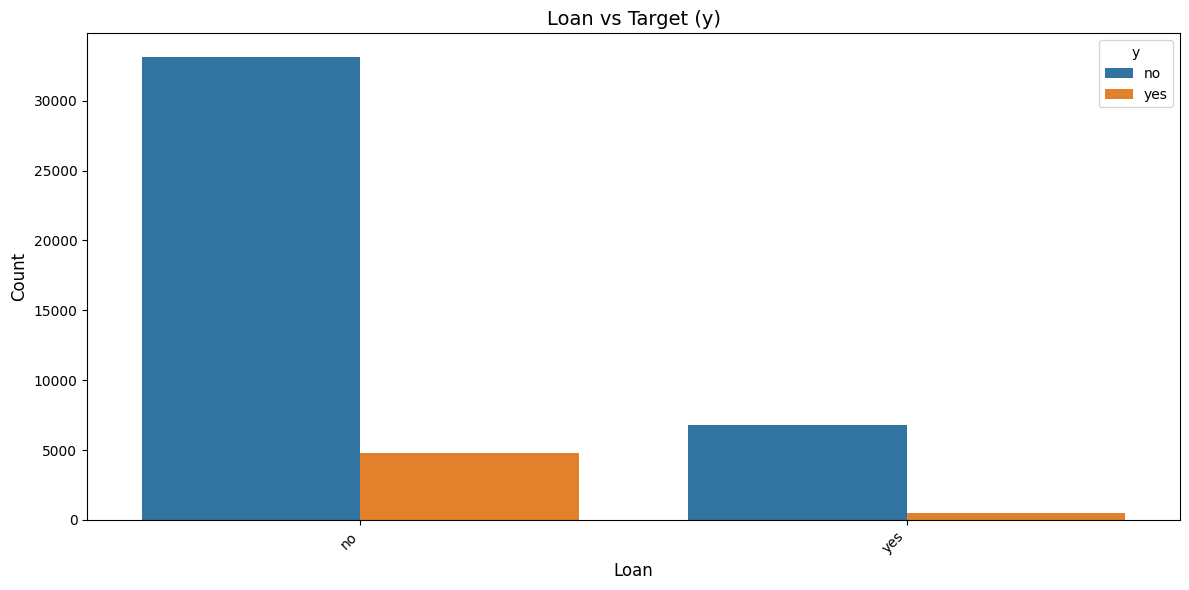

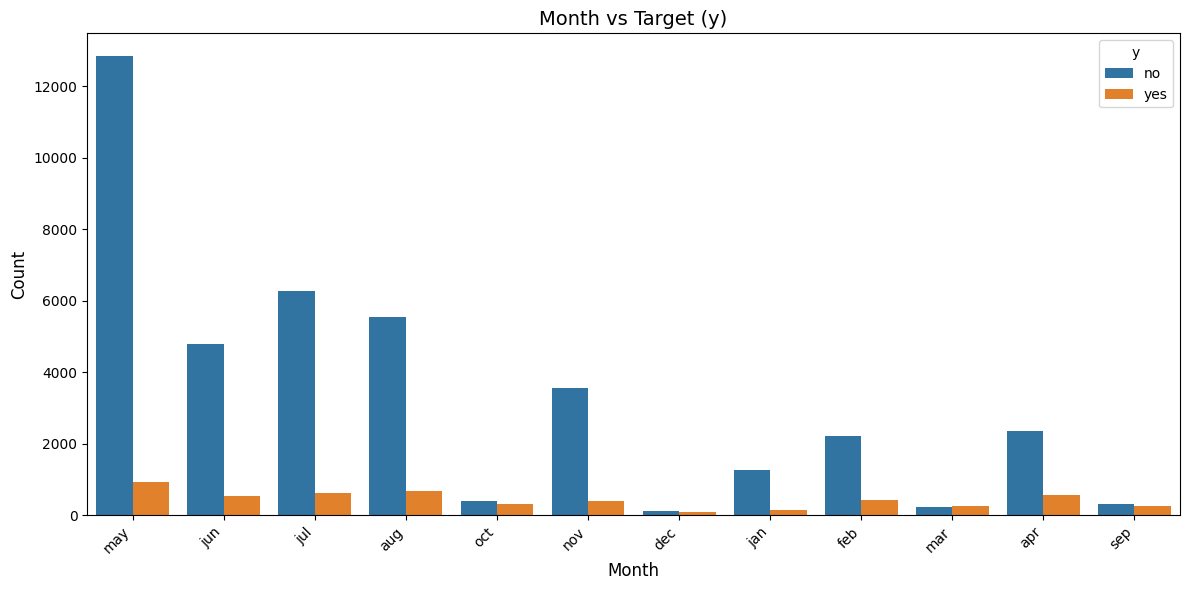

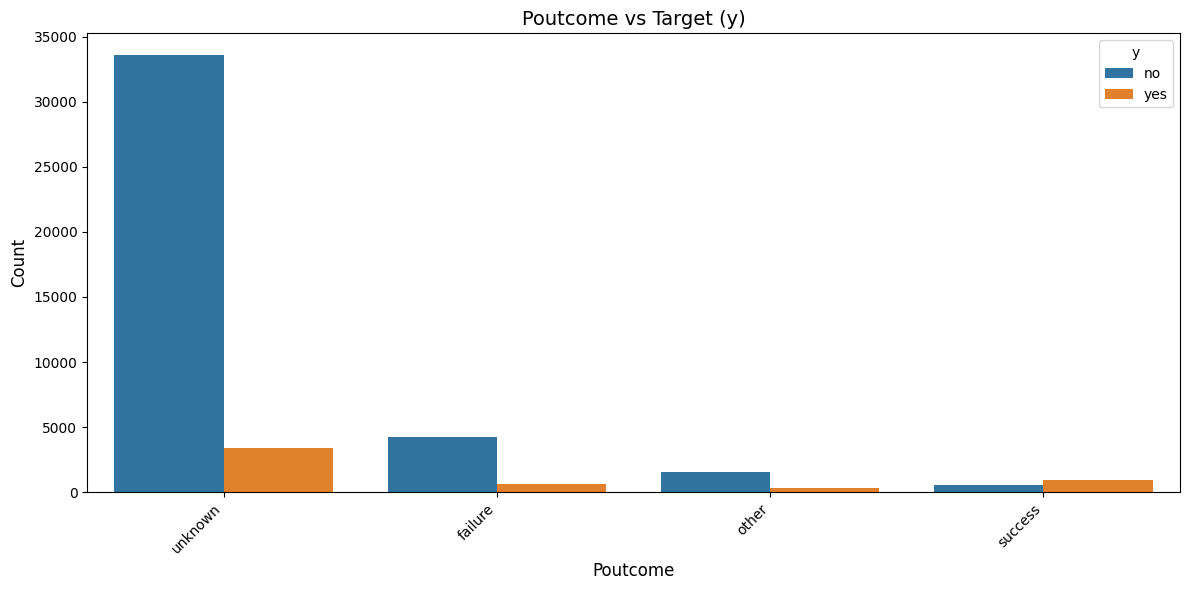

In [15]:
#Zooming in on the categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(12, 6))  # Increase width and height
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f"{col.capitalize()} vs Target (y)", fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()
